# Aim #

Our goal is to predict whether a person has cardiovascular diseases based on the categorical data provided to us in the data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
sb.set()

In [2]:
cardiodata = pd.read_csv('cardio_train.csv', sep=";")
cardiodata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
print("Data type : ", type(cardiodata))
print("Data dims : ", cardiodata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (70000, 13)


---
# Null Data #
We tested for null data but everything seems to be proper.

In [4]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


---
# Age #

We observed that the ages of the sample were in days instead of years.<br>
Therefore we decided to change it to years (Integer)

In [5]:
cardiodata['age'] = round(cardiodata['age']/365.25,0)

---
# Duplicates #
We figured there might be duplicated values after we changed the ages to integer values. We decided to check for duplicated values in our data.

In [6]:
cardiodata.drop(['id'], axis=1, inplace=True)
print("There are " + str(cardiodata.duplicated().sum()) + " duplicated data values")

There are 3821 duplicated data values


In [7]:
cardiodata.drop_duplicates(inplace=True)

---
# BMI #

In order to properly measure the effect of height and weight on cardiovascular disease, we decided to convert them to BMI.

In [8]:
cardiodata.insert(5, 'bmi', round((cardiodata['weight']/(cardiodata['height']/100)**2), 2))

---
# Describing data #

In [9]:
cardiodata.describe()

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000,66179.000000
mean,53.327445,1.357107,164.345684,74.581171,129.306850,27.704169,97.609332,1.386014,1.238142,0.092748,0.056710,0.797549,0.513713
std,6.803794,0.479150,8.353594,14.613557,158.374251,6.201736,193.789748,0.692225,0.584110,0.290082,0.231289,0.401830,0.499816
min,30.000000,1.000000,55.000000,10.000000,-150.000000,3.470000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,23.880000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,26.570000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,30.470000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,298.670000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
cardiodata

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,21.97,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,34.93,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,23.51,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,28.71,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,23.01,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,26.93,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,50.47,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,31.35,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,27.10,80,1,2,0,0,0,1


It seems our dataset is much cleaner now. However, there seems to be some erroneous data values for __bmi, ap_hi, ap_lo.__

---
# Removing erroneous data #

There were many erroneous data in the sample, such as blood pressure being impossibly high or negative in value, and unrealistic BMI levels

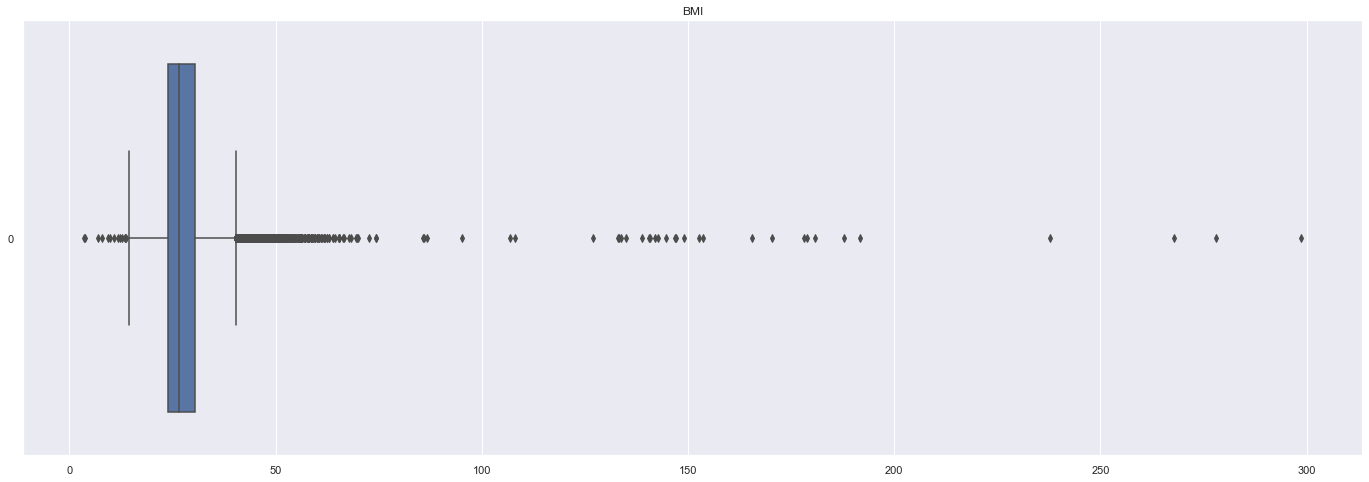

In [11]:
f = plt.figure(figsize=(24, 8))
sb.boxplot(data = cardiodata['bmi'], orient = "h").title.set_text('BMI')

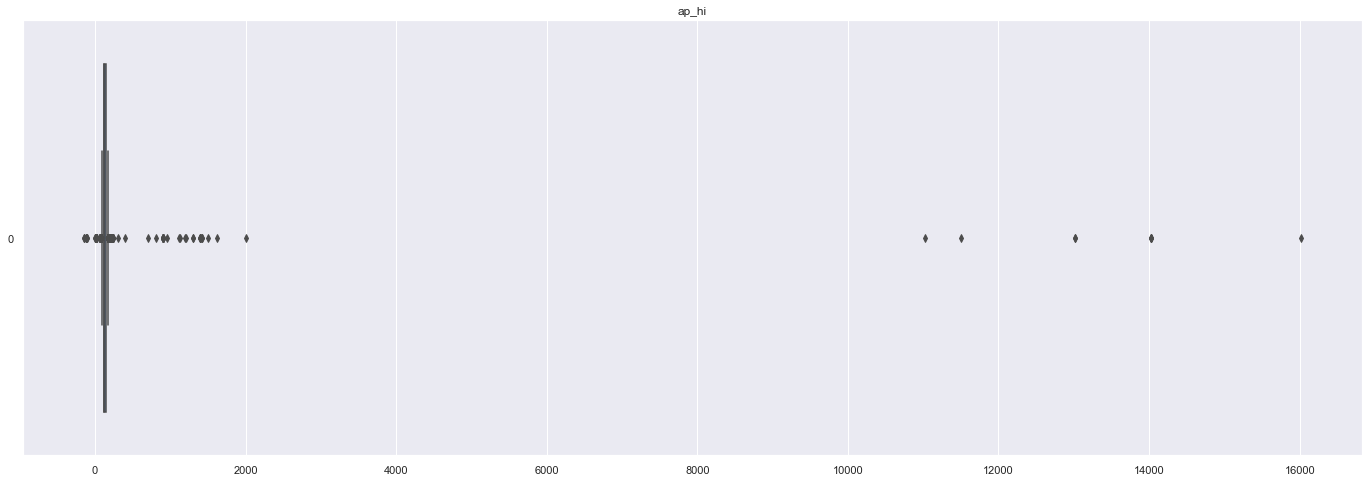

In [12]:
f = plt.figure(figsize=(24, 8))
sb.boxplot(data = cardiodata['ap_hi'], orient = "h").title.set_text('ap_hi')

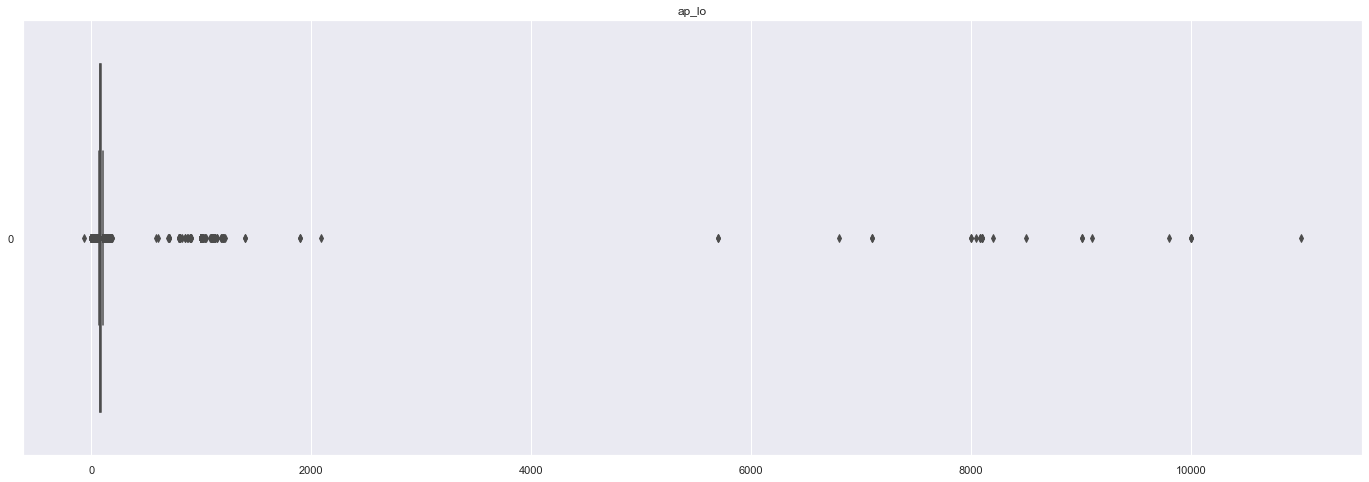

In [13]:
f = plt.figure(figsize=(24, 8))
sb.boxplot(data = cardiodata['ap_lo'], orient = "h").title.set_text('ap_lo')

In [14]:
# Remove BMI below 15 and above 60
cardiodata.drop(cardiodata.query('bmi > 60 or bmi < 15').index, axis=0, inplace=True)

In [15]:
# Remove ap_hi above 220, ap_lo above 180, and both below 40
cardiodata.drop(cardiodata.query('ap_hi > 220 or ap_lo > 180 or ap_hi < 40 or ap_lo < 40').index, axis=0, inplace=True)
cardiodata

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,21.97,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,34.93,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,23.51,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,28.71,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,23.01,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,26.93,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,50.47,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,31.35,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,27.10,80,1,2,0,0,0,1


---
# Categorial Data #

To make it easier to categorise ap_hi and ap_lo into a single category, we decided to separate blood pressure into 5 categories
<br><br>
1: normal<br>
2: elevated<br>
3: high 1 (hypertension stage 1)<br>
4: high 2 (hypertension stage 2)<br>
5: high 3 (hypertensive crisis)<br>

In [16]:
def BPCategorize(x,y):
    if x<=120 and y<=80:
        return 1
    elif x<=129 and y<=80:
        return 2
    elif x<=139 or y<=89:
        return 3
    elif x<=180 or y<=120:
        return 4
    elif x>180 or y>120:
        return 5
    else:
        return None
    
cardiodata.insert(8, "bp_cat", cardiodata.apply(lambda row: BPCategorize(row['ap_hi'], row['ap_lo']), axis=1))
cardiodata['bp_cat'].value_counts()

1    35281
3    15092
4    14039
2      417
5       28
Name: bp_cat, dtype: int64

In [17]:
cardiodata

,age,gender,height,weight,ap_hi,bmi,ap_lo,cholesterol,bp_cat,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,21.97,80,1,1,1,0,0,1,0
1,55.0,1,156,85.0,140,34.93,90,3,4,1,0,0,1,1
2,52.0,1,165,64.0,130,23.51,70,3,3,1,0,0,0,1
3,48.0,2,169,82.0,150,28.71,100,1,4,1,0,0,1,1
4,48.0,1,156,56.0,100,23.01,60,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,26.93,80,1,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,50.47,90,2,4,2,0,0,1,1
69997,52.0,2,183,105.0,180,31.35,90,3,4,1,0,1,0,1
69998,61.0,1,163,72.0,135,27.10,80,1,3,2,0,0,0,1


---
# Data Count

From the countplots, we observed that there is an almost __equal__ number of people with cardiovascular diseases and people with none.<br>
There is a much __greater percentage of women compared to men.__<br>
Majority of people have __normal glucose and cholesterol levels.__<br>
Majority of people are __active__, and __do not smoke or drink alcohol.__<br>
Most people have __normal blood pressure__, but there is a significant portion with __hypertension stage 1 and 2.__

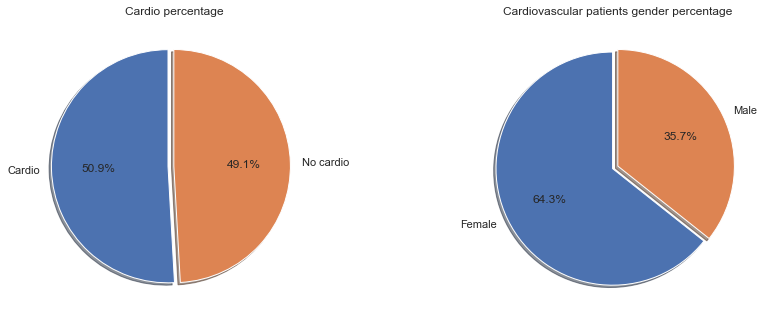

In [18]:
base_color = sb.color_palette()[0]

def gender(x):
    if x==1:
        return 'female'
    else:
        return 'male'

fig, ax = plt.subplots(1,2, figsize=(14,20))
plt.tight_layout(pad=10)
ax[0].pie(x=cardiodata['cardio'].value_counts(), labels=['Cardio', 'No cardio'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[0].title.set_text('Cardio percentage')
gender = cardiodata.query("cardio == 1").apply(lambda row: gender(row['gender']), axis=1).value_counts()
ax[1].pie(x=gender, labels=['Female', 'Male'],autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.05,0.0))
ax[1].title.set_text('Cardiovascular patients gender percentage')

[Text(0, 0, 'normal'),
 Text(1, 0, 'elevated'),
 Text(2, 0, 'high 1'),
 Text(3, 0, 'high 2'),
 Text(4, 0, 'high 3')]

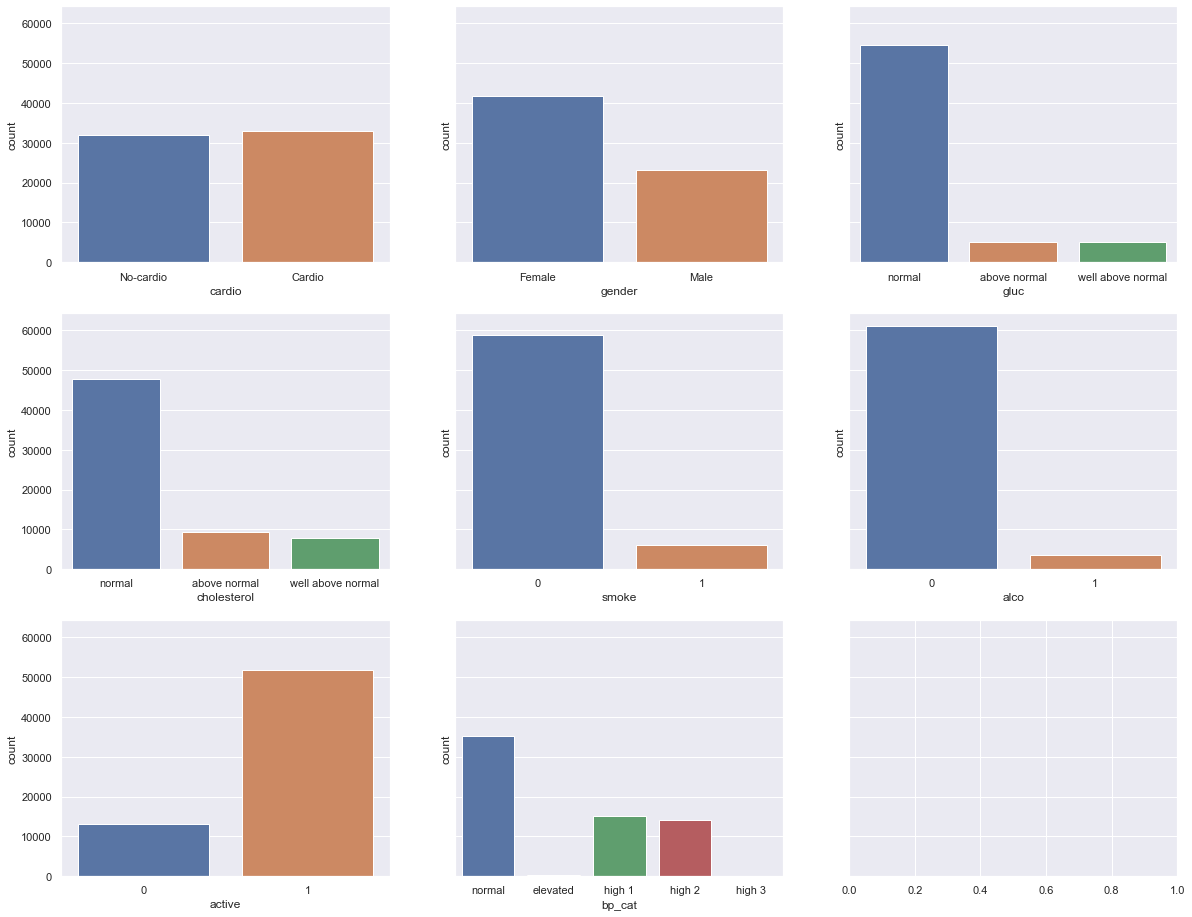

In [19]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16), sharey=True)

sb.countplot(x="cardio", data=cardiodata, ax=ax[0,0]).set_xticklabels(['No-cardio', 'Cardio'])
sb.countplot(x="gender", data=cardiodata, ax=ax[0,1]).set_xticklabels(['Female', 'Male'])
sb.countplot(x="gluc", data=cardiodata, ax=ax[0,2]).set_xticklabels(['normal', 'above normal', 'well above normal'])
sb.countplot(x="cholesterol", data=cardiodata, ax=ax[1,0]).set_xticklabels(['normal', 'above normal', 'well above normal'])
sb.countplot(x="smoke", data=cardiodata, ax=ax[1,1])
sb.countplot(x="alco", data=cardiodata, ax=ax[1,2])
sb.countplot(x="active", data=cardiodata, ax=ax[2,0])
sb.countplot(x="bp_cat", data=cardiodata, ax=ax[2,1]).set_xticklabels(['normal', 'elevated', 'high 1', 'high 2', 'high 3'])

---
# Picking out trends with Boxplot #

From the boxplots, we observed that cardiovascular disease is more likely to occur at higher ages, bmi, and blood pressure.

[Text(0, 0, 'No-cardio'), Text(0, 1, 'Cardio')]

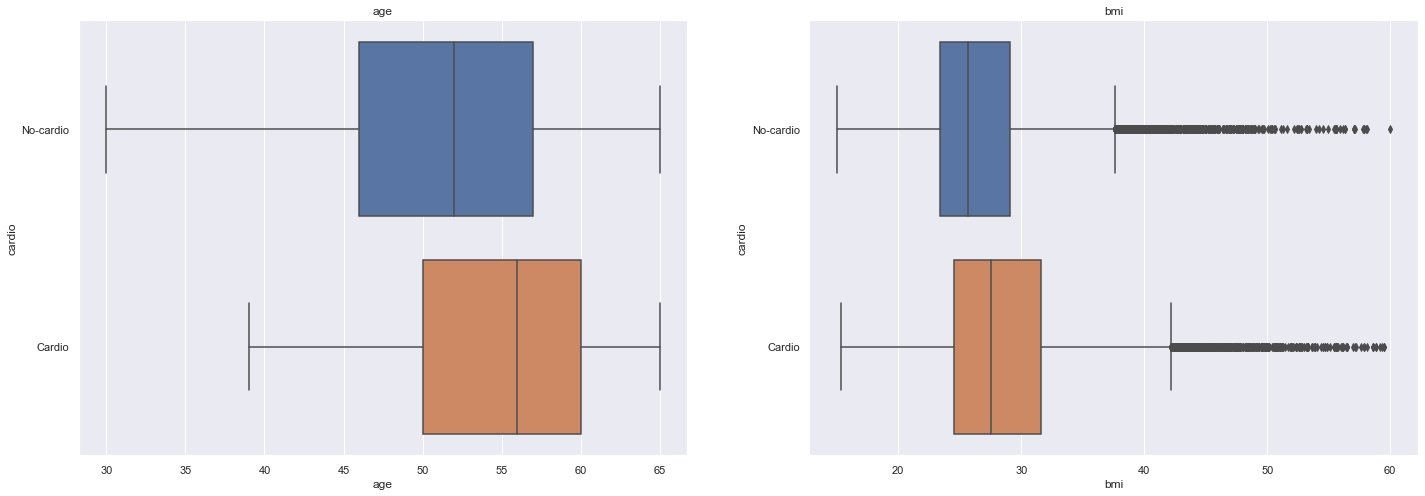

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=(24,8))
sb.boxplot(data=cardiodata, x='age', y='cardio', ax=ax[0], orient = "h")
sb.boxplot(data=cardiodata, x='bmi', y='cardio', ax=ax[1], orient = "h")

ax[0].title.set_text('age')
ax[0].set_yticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('bmi')
ax[1].set_yticklabels(['No-cardio', 'Cardio'])

[Text(0, 0, 'No-cardio'), Text(0, 1, 'Cardio')]

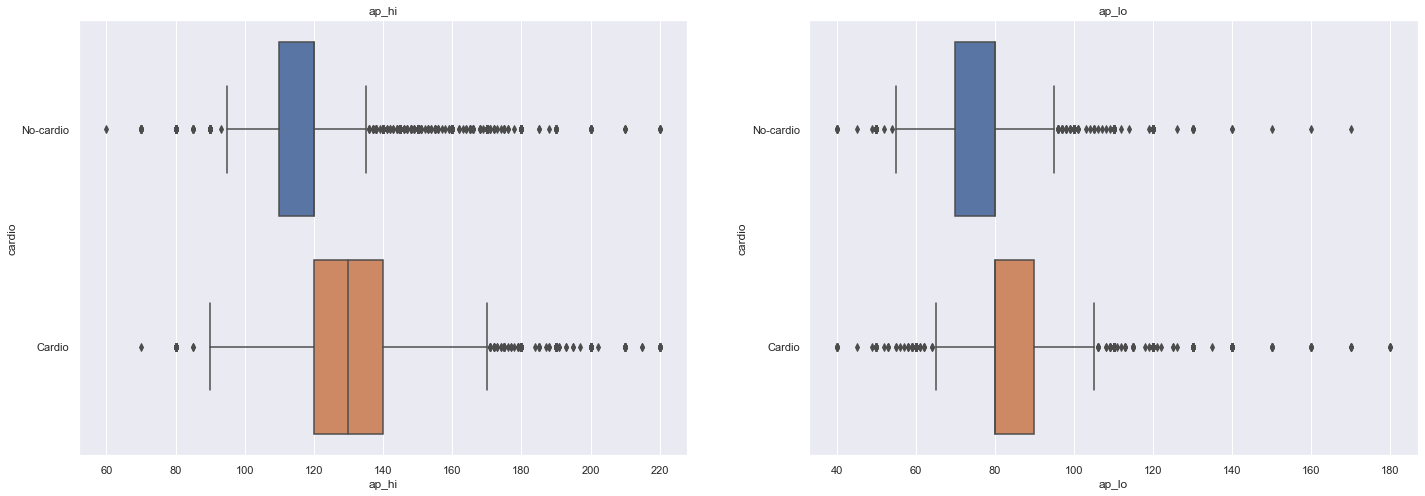

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=(24,8))
sb.boxplot(data=cardiodata, x='ap_hi', y='cardio', ax=ax[0], orient = "h")
sb.boxplot(data=cardiodata, x='ap_lo', y='cardio', ax=ax[1], orient = "h")

ax[0].title.set_text('ap_hi')
ax[0].set_yticklabels(['No-cardio', 'Cardio'])
ax[1].title.set_text('ap_lo')
ax[1].set_yticklabels(['No-cardio', 'Cardio'])

---
# Picking out trends with Barplot #

From the barplots, we observed that people with certain features tend to have a higher percentage of having cardiovascular diseases.<br>
Those with __higher glucose and cholesterol levels__ have a higher chance of having cardiovascular diseases.<br>
However, the most obvious category is blood pressure. Those with __higher blood pressure__ are much more likely to have cardiovascular diseases.<br>
The rest of the features are not good predictors of cardiovascular diseases as there seems to be __little variation in percentages.__

[Text(151.125, 0.5, 'Cardio Pecentage'),
 Text(151.125, 0.5, 'Cardio Pecentage'),
 Text(151.125, 0.5, 'Cardio Pecentage')]

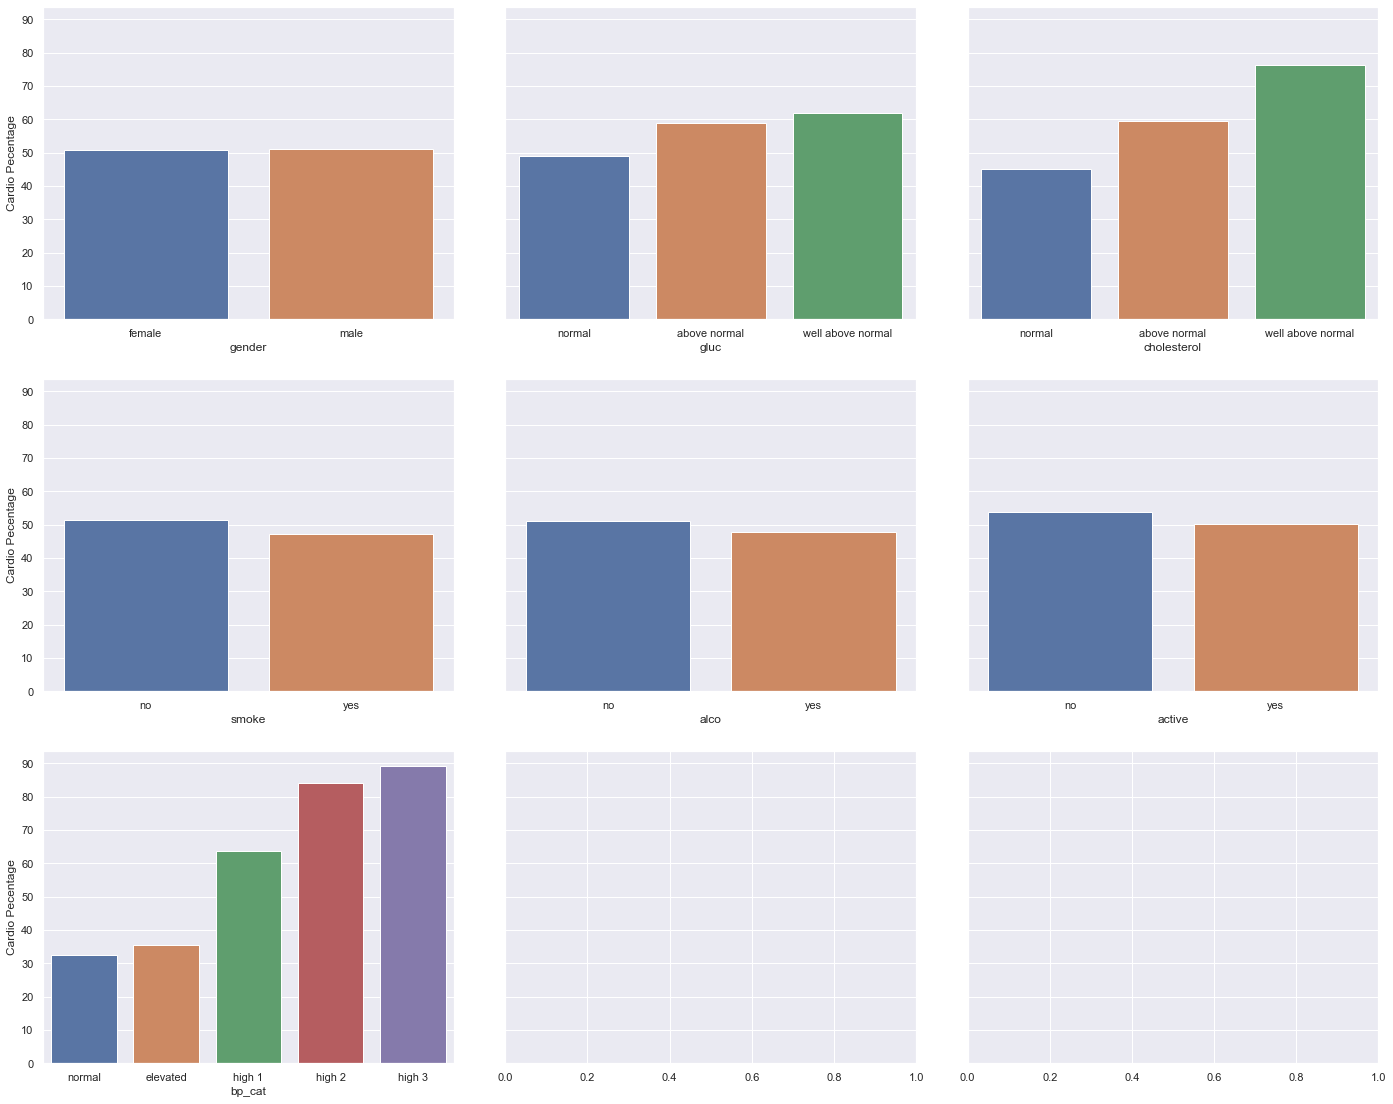

In [22]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(20,16), sharey=True)
plt.tight_layout(pad=3)

cardiodata_gender = cardiodata.groupby('gender').mean()
sb.barplot(data=cardiodata_gender, x=cardiodata_gender.index, y='cardio', ax=ax[0][0])
ax[0][0].set_xticklabels(['female', 'male'])
ax[0][0].set_yticks(np.arange(0, 1.2, 0.1))
ax[0][0].set_yticklabels(np.arange(0, 120, 10))

cardiodata_gluc = cardiodata.groupby('gluc').mean()
sb.barplot(data=cardiodata_gluc, x=cardiodata_gluc.index, y='cardio', ax=ax[0][1])
ax[0][1].set_xticklabels(['normal', 'above normal', 'well above normal'])

cardiodata_cholesterol = cardiodata.groupby('cholesterol').mean()
sb.barplot(data=cardiodata_cholesterol, x=cardiodata_cholesterol.index, y='cardio', ax=ax[0][2])
ax[0][2].set_xticklabels(['normal', 'above normal', 'well above normal'])

cardiodata_smoke = cardiodata.groupby('smoke').mean()
sb.barplot(data=cardiodata_smoke, x=cardiodata_smoke.index, y='cardio', ax=ax[1][0])
ax[1][0].set_xticklabels(['no', 'yes'])

cardiodata_alco = cardiodata.groupby('alco').mean()
sb.barplot(data=cardiodata_alco, x=cardiodata_alco.index, y='cardio', ax=ax[1][1])
ax[1][1].set_xticklabels(['no', 'yes'])

cardiodata_active = cardiodata.groupby('active').mean()
sb.barplot(data=cardiodata_active, x=cardiodata_active.index, y='cardio', ax=ax[1][2])
ax[1][2].set_xticklabels(['no', 'yes'])

cardiodata_bp = cardiodata.groupby('bp_cat').mean()
sb.barplot(data=cardiodata_bp, x=cardiodata_bp.index, y='cardio', ax=ax[2][0],)
ax[2][0].set_xticklabels(['normal', 'elevated', 'high 1', 'high 2', 'high 3'])
plt.setp(ax[:, :], ylabel='')
plt.setp(ax[:, 0], ylabel='Cardio Pecentage')

---
# Predicting cardiovascular disease with basic probability #

As an initial test, we will find the probability of somebody having cardiovascular disease according to the category they are part of.<br><br>
The calculation was done using __conditional probability.__ e.g. P(B | A) = P(B and A) / P(A)

In [23]:
cardiodata_age_60 = cardiodata.query('age >=60')
cardiodata_age_60_cardio = cardiodata_age_60.query('cardio==1')
print("The probability that a person above the age of 60 has cardiovascular diseases is " 
      + str(round(cardiodata_age_60_cardio.shape[0]*100/cardiodata_age_60.shape[0],2)) + "%")

The probability that a person above the age of 60 has cardiovascular diseases is 66.37%


In [24]:
cardiodata_bmi35 = cardiodata.query('bmi >= 35')
cardiodata_bmi35_cardio = cardiodata_bmi35.query('cardio ==1')
round(cardiodata_bmi35_cardio.shape[0]*100/cardiodata_bmi35.shape[0],2)
print("The probability that a person with bmi of 35 and above has cardiovascular diseases is " 
      + str(round(cardiodata_bmi35_cardio.shape[0]*100/cardiodata_bmi35.shape[0],2)) + "%")

The probability that a person with bmi of 35 and above has cardiovascular diseases is 67.78%


In [25]:
cardiodata_high1 = cardiodata.query("bp_cat == 3")
cardiodata_high_cardio = cardiodata_high1.query('cardio == 1')
round(cardiodata_high_cardio.shape[0]*100/cardiodata_high1.shape[0],2)
print("The probability that a person with high blood pressure stage 1 has cardiovascular diseases is "
      + str(round(cardiodata_high_cardio.shape[0]*100/cardiodata_high1.shape[0],2)) + "%")

The probability that a person with high blood pressure stage 1 has cardiovascular diseases is 63.69%


In [26]:
cardiodata_high2 = cardiodata.query("bp_cat == 4")
cardiodata_high_cardio = cardiodata_high1.query('cardio == 1')
round(cardiodata_high_cardio.shape[0]*100/cardiodata_high2.shape[0],2)
print("The probability that a person with high blood pressure stage 2 has cardiovascular diseases is " 
      + str(round(cardiodata_high_cardio.shape[0]*100/cardiodata_high2.shape[0],2)) + "%")

The probability that a person with high blood pressure stage 2 has cardiovascular diseases is 68.47%


In [27]:
cardiodata_high3 = cardiodata.query("bp_cat == 5")
cardiodata_high_cardio = cardiodata_high3.query('cardio == 1')
round(cardiodata_high_cardio.shape[0]*100/cardiodata_high3.shape[0],2)
print("The probability that a person with hypertensive crisis has cardiovascular diseases is " 
      + str(round(cardiodata_high_cardio.shape[0]*100/cardiodata_high3.shape[0],2)) + "%")

The probability that a person with hypertensive crisis has cardiovascular diseases is 89.29%


In [28]:
cardiodata_gluc_high = cardiodata.query('gluc==3')
cardiodata_gluc_high_cardio = cardiodata_gluc_high.query('cardio==1')
print("The probability that a person who has well above normal glucose levels has cardiovascular diseases is " 
      + str(round(cardiodata_gluc_high_cardio.shape[0]*100/cardiodata_gluc_high.shape[0],2)) + "%")

The probability that a person who has well above normal glucose levels has cardiovascular diseases is 61.82%


In [29]:
cardiodata_chol_high = cardiodata.query('cholesterol==3')
cardiodata_chol_high_cardio = cardiodata_chol_high.query('cardio==1')
print("The probability that a person who has well above normal cholesterol levels has cardiovascular diseases is " 
      + str(round(cardiodata_chol_high_cardio.shape[0]*100/cardiodata_chol_high.shape[0],2)) + "%")

The probability that a person who has well above normal cholesterol levels has cardiovascular diseases is 76.28%


The probabilities show that __age, bmi, bp_cat, gluc and cholestrol__ are __good predictors__ of cardiovascular diseases.

---
# Predicting cardiovascular disease with Logistic Regression #

In statistics, the logistic model is a statistical model that models the probability of an event taking place by having the log-odds for the event be a linear combination of one or more independent variables.<br>
Formally, in binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labeled "0" and "1", while the independent variables can each be a binary variable or a continuous variable.
<br><br>
Therefore, it functions more like a classification technique.

---
# Logistic Regression #

Response Variable : __cardio__
<br>
Predictor Feature : __all except cardio__

Train Set : (48642, 1) (48642, 11)
Test Set  : (16215, 1) (16215, 11)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7220303441470334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7130434782608696



<AxesSubplot:>

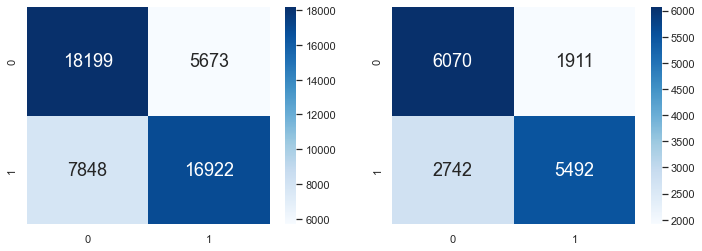

In [30]:
# Extract Response and Predictors
X = cardiodata.drop(["cardio", "height", 'weight'],axis=1)
y = pd.DataFrame(cardiodata["cardio"])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Modelling
lr = LogisticRegression(C = 0.2, solver = 'liblinear')
lr.fit(X_train,y_train.values.ravel())

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", lr.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", lr.score(X_test, y_test))
print()
test_a = lr.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Blues")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

---
# Removing unneeded features #

Now that we have combined __height__ & __weight__ into __bmi__, __ap_lo__ & __ap_hi__ into __bp_cat__, and we know which features are useful predictors, it is time to drop the features that we don't need for classification.

In [31]:
cardiodata = cardiodata.drop(columns=['height', 'weight', 'ap_hi', 'ap_lo', 'alco', 'smoke', 'active', 'gender'])
cardiodata.head()

,age,bmi,cholesterol,bp_cat,gluc,cardio
0,50.0,21.97,1,1,1,0
1,55.0,34.93,3,4,1,1
2,52.0,23.51,3,3,1,1
3,48.0,28.71,1,4,1,1
4,48.0,23.01,1,1,1,0


In [32]:
cardiodata.describe()

,age,bmi,cholesterol,bp_cat,gluc,cardio
count,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000,64857.000000
mean,53.314291,27.597517,1.384153,2.122932,1.237939,0.508873
std,6.806901,5.285539,0.691294,1.277231,0.584114,0.499925
min,30.000000,15.010000,1.000000,1.000000,1.000000,0.000000
25%,48.000000,23.880000,1.000000,1.000000,1.000000,0.000000
50%,54.000000,26.570000,1.000000,1.000000,1.000000,1.000000
75%,58.000000,30.460000,2.000000,3.000000,1.000000,1.000000
max,65.000000,60.000000,3.000000,5.000000,3.000000,1.000000


---

# Multi-Variate Classification Tree #  

Response Variable : __cardio__
<br>
Predictor Feature : __age, bmi, bp_cat, cholesterol, gluc__      

In [33]:
# Extract Response and Predictors
y = pd.DataFrame(cardiodata['cardio'])
X = pd.DataFrame(cardiodata[["age", "bmi", "bp_cat", "cholesterol", 'gluc']]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (48642, 1) (48642, 5)
Test Set  : (16215, 1) (16215, 5)


In [34]:
X_train.describe()

,age,bmi,bp_cat,cholesterol,gluc
count,48642.000000,48642.000000,48642.000000,48642.000000,48642.000000
mean,53.304572,27.596915,2.120842,1.386415,1.237285
std,6.798181,5.299646,1.277349,0.693254,0.583788
min,30.000000,15.010000,1.000000,1.000000,1.000000
25%,48.000000,23.880000,1.000000,1.000000,1.000000
50%,54.000000,26.560000,1.000000,1.000000,1.000000
75%,58.000000,30.440000,3.000000,2.000000,1.000000
max,65.000000,60.000000,5.000000,3.000000,3.000000


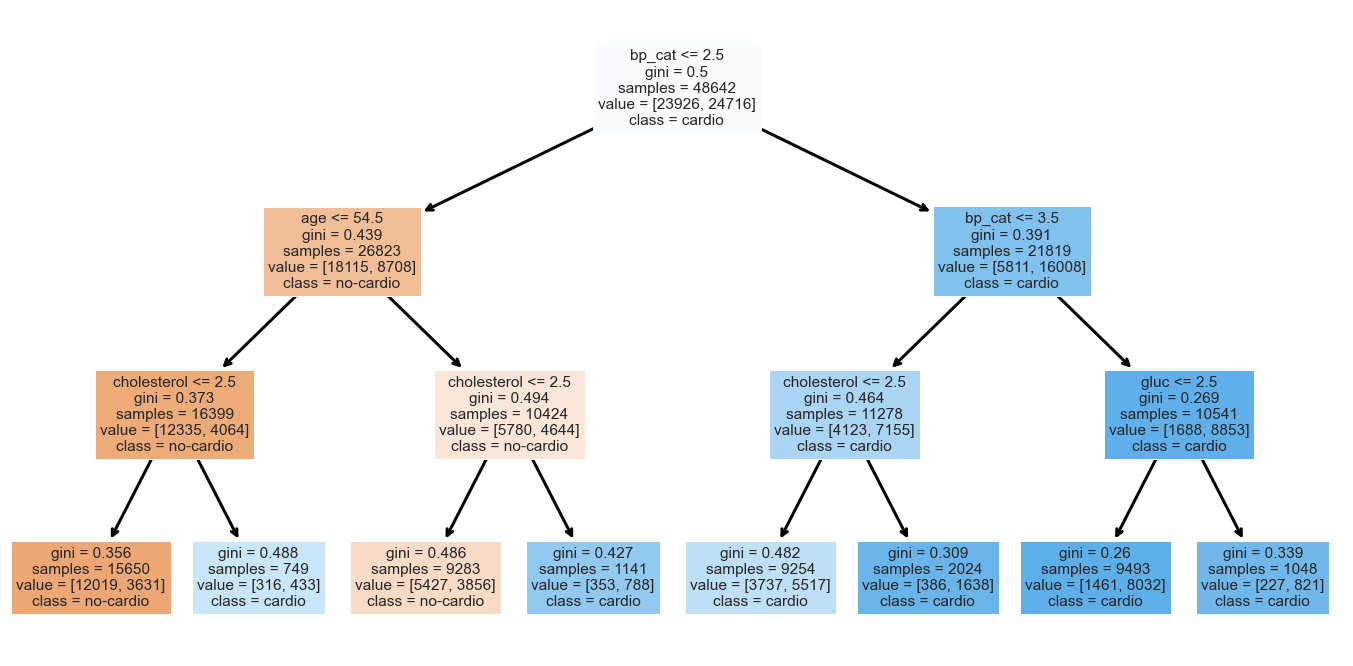

In [35]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(24, 12))
out = plot_tree(dectree, 
          feature_names = X_train.columns,
          class_names = ["no-cardio", "cardio"],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7128613132683689

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7172987974098057



<AxesSubplot:>

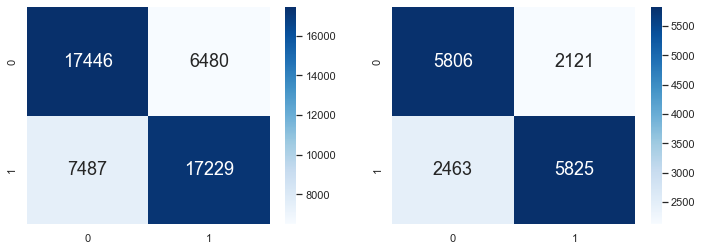

In [36]:
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
test_M = dectree.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Blues")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

---
# Advanced Classification Techniques #

Evidently, the normal decision tree might not be accurate enough, with a maximum test accuracy of __71%__ to __73%.__<br>
Therefore, we will use the improved models of Random Forest Classification and Gradient Boosting Classification to improve our prediction accuracy.

---
# Random Forest Classification #

Random forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. <br>For classification tasks, the output of the random forest is the class selected by most trees. Random decision forests correct for decision trees' habit of overfitting to their training set. 
<br><br>
Random forests generally outperform decision trees.

Response Variable : __cardio__
<br>
Predictor Feature : __age, bmi, bp_cat, cholesterol, gluc__

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7254841495004317

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7228492136910268



<AxesSubplot:>

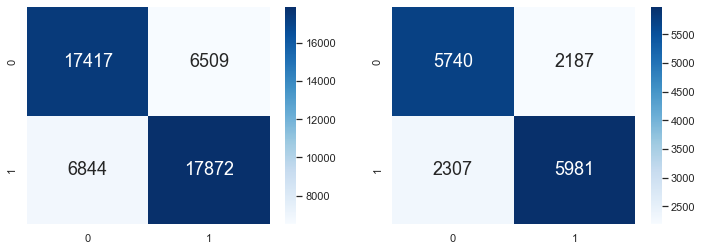

In [37]:
rf = RandomForestClassifier(max_depth = 8, n_estimators = 50)
rf.fit(X_train, y_train.values.ravel())

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rf.score(X_test, y_test))
print()
test_rf = rf.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Blues")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

---
# Gradient Boosting Classification #

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.<br>
When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees.<br><br>
It usually outperforms random forest and decision trees.<br><br>

Response Variable : __cardio__
<br>
Predictor Feature : __age, bmi, bp_cat, cholesterol, gluc__

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7226676534681962

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7244526672833795



<AxesSubplot:>

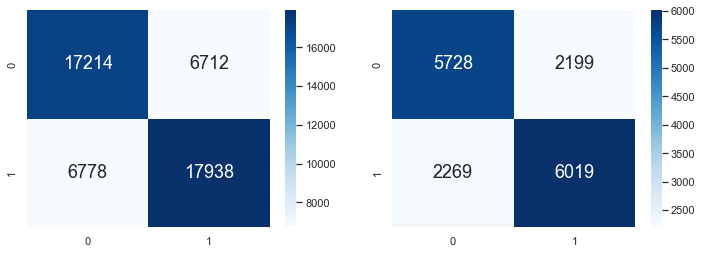

In [38]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, max_depth=3)
clf.fit(X_train, y_train.values.ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", clf.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", clf.score(X_test, y_test))
print()
test_gb = clf.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Blues")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

---
# Support-vector Machine Classification #
SVM training algorithm builds a model that assigns new examples to one category or the other.<br>
SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.<br><br>

Response Variable : __cardio__
<br>
Predictor Feature : __age, bmi, bp_cat, cholesterol, gluc__

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7122856790428025

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7193339500462534



<AxesSubplot:>

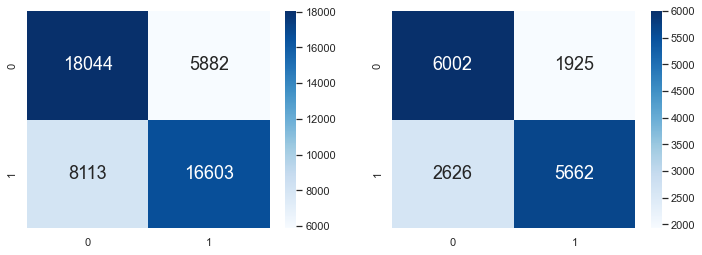

In [39]:
svc = make_pipeline(StandardScaler(), LinearSVC(max_iter=2000))
svc.fit(X_train, y_train.values.ravel())

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", svc.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", svc.score(X_test, y_test))
print()
test_sv = svc.score(X_test, y_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap="Blues")
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap="Blues")

---
# Results for test set using Advanced Classification Techniques #

In [40]:
print("Technique\t\t\tMulti-variate Classification Tree")
print("Classification Accuracy \t:", round(test_M,3))
print()

print("Technique\t\t\tRandom Forest Classification")
print("Classification Accuracy \t:", round(test_rf,3))
print()

print("Technique\t\t\tGradient Boosting Classification")
print("Classification Accuracy \t:", round(test_gb,3))
print()

print("Technique\t\t\tSupport-vector Machine Classification")
print("Classification Accuracy \t:", round(test_sv,3))

Technique			Multi-variate Classification Tree
Classification Accuracy 	: 0.717

Technique			Random Forest Classification
Classification Accuracy 	: 0.723

Technique			Gradient Boosting Classification
Classification Accuracy 	: 0.724

Technique			Support-vector Machine Classification
Classification Accuracy 	: 0.719


---
# Conclusion #

The Advanced methods of Random Forest and Gradient Boosting saw a slight improvement in test accuracy to about 72% - 73%.<br>
Although it is not a major improvement, we managed to implement a better model than the basic decision tree into our Cardiovascular disease prediction.<br><br>
We are confident that we can predict cardiovasular disease using the predictors __age, bmi, bp_cat, cholesterol, gluc__ at __72%__ to __73%__ accuracy.